<a href="https://colab.research.google.com/github/tanyagupta1/Machine-Learning/blob/main/BTP/raw_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Things to Analyse:**
4. no of isolated posts
5. no of posts with no body
6. no of posts in which op didn't return
7. no of back and forth posts
8. no of deleted posts
9. distribution of number of comments
10. avg length of title
11. avg length of post
12. avg comment length
13. distribution of time of posting
14. distribution of day of posting
15. total interval of collected posts

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ADHD_com.csv to ADHD_com.csv
Saving ptsd_com.csv to ptsd_com.csv


In [ ]:
#import stuff
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
%matplotlib inline
#https://python.plainenglish.io/how-to-use-pandas-profiling-on-google-colab-e34f34ff1c9f

In [ ]:
subreddit="ptsd"
posts = subreddit + "_sub.csv"
comments = subreddit + "_com.csv"

**Post analysis**

In [ ]:
post_df = pd.read_csv(posts)
comment_df = pd.read_csv(comments)
#pp.ProfileReport(post_df)

In [ ]:
subs = ["ADHD","Anger","Anxiety","BPD","OCD","OpiatesRecovery","SuicideWatch","addiction","alcoholicsanonymous","depression","domesticviolence","eating_disorders","getting_over_it","helpmecope","mentalillness","rapecounseling","sad","selfharm","selfhelp","socialanxiety"]
for topic in subs:
  tmp_post_df = pd.read_csv(topic+"_sub.csv")
  tmp_com_df = pd.read_csv(topic+"_com.csv")
  post_df=post_df.append(tmp_post_df,ignore_index=True)
  comment_df=comment_df.append(tmp_com_df,ignore_index=True)

In [ ]:
len(post_df)
# comment_df.head()
# comment_df.head()

10896

In [ ]:
len(comment_df)
# pp.ProfileReport(post_df)

59342

In [ ]:
comms = post_df.nlargest(300,'numComms')['numComms']
print(comms)
post_df['numComms'].sum()
# post_df.subreddit.unique()

In [ ]:
#avg word length
post_df['body_len']=post_df['body'].str.split().str.len()
post_df['title_len']=post_df['title'].str.split().str.len()
post_df.head()
# comment_df['com_len']=comment_df['body'].str.split().str.len()
# comment_df.head()


Removing "[deleted]" and "[removed]" comments and posts

In [ ]:
post_df = post_df.drop(post_df[(post_df.body=="[removed]")].index)
post_df = post_df.drop(post_df[(post_df.body=="[deleted]")].index)
post_df = post_df.drop(post_df[(post_df.author=="[deleted]")].index)

comment_df = comment_df.drop(comment_df[(comment_df.body=="[removed]")].index)
comment_df = comment_df.drop(comment_df[(comment_df.body=="[deleted]")].index)
comment_df = comment_df.drop(comment_df[(comment_df.body=="[deleted]")].index)
print(len(post_df),len(comment_df))

10118 58279


In [ ]:
post_df['body_len'].fillna(0,inplace=True)
post_df['body'].fillna("",inplace=True)

In [ ]:
comment_report = pp.ProfileReport(comment_df)
comment_report.to_file("comment_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
post_report = pp.ProfileReport(post_df)
post_report.to_file("post_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Plotting time and date distribution of posts

In [ ]:
post_df.head()
result = [str(x) for x in post_df['created']]
# index of hour 11-13
print(result[0][11:13])
time_of_post={}
for i in range(24):
  time_of_post[i] = 0
for time in result:
  time_of_post[int(time[11:13])]+=1

20


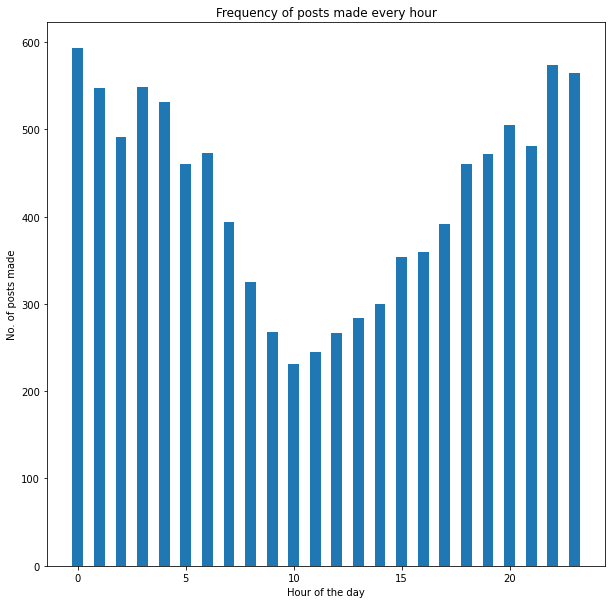

In [ ]:
hours = list(time_of_post.keys())
frequency = list(time_of_post.values())
fig = plt.figure(figsize = (10, 10))
plt.bar(hours, frequency,width = 0.5)
plt.xlabel("Hour of the day")
plt.ylabel("No. of posts made")
plt.title("Frequency of posts made every hour")
plt.show()

In [ ]:
ff = comment_df.loc[(comment_df['is_op']),['post_id']]
interactive_posts = set(ff['post_id'])
len(interactive_posts)
print(len(set(comment_df['post_id'])))

8445


Isolated post analysis

Non-interactive posts

1.   No of unique users replying
2.   body len
3.   title len
4.   no of comments

In [ ]:
all_post_ids = set(post_df['sub_id'])
len(all_post_ids)

10118

In [ ]:
final_num_com={}
no_of_unique_posters={}
no_of_op_coms={}
no_of_non_op_coms={}
for id in all_post_ids:
  spec_com = comment_df[comment_df['post_id']==id]
  unique_posters = len(set(spec_com['author']))
  num_com_by_op=len(spec_com[spec_com['is_op']==True])
  final_num_com[id]=len(spec_com)
  no_of_unique_posters[id]=unique_posters
  no_of_op_coms[id]=num_com_by_op
  no_of_non_op_coms[id] =len(spec_com)-num_com_by_op

post_df['actual_com'] =post_df['sub_id'].map(final_num_com)
post_df['no_of_posters'] = post_df['sub_id'].map(no_of_unique_posters)
post_df['num_com_by_op'] =post_df['sub_id'].map(no_of_op_coms)
post_df['num_com_by_not_by_op'] =post_df['sub_id'].map(no_of_non_op_coms)
# post_df
# post_df.head()

In [ ]:
print(len(post_df))

10118


In [ ]:
post_report = pp.ProfileReport(post_df)
post_report.to_file("post_analysis_final")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/pandas_profiling/profile_report.py:263: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  f"Extension {suffix} not supported. For now we assume .html was intended. "


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Interactive posts


1.   body length
2.   comm length
3.   no of comments
4.   no of unique users
5.   no of op replies



In [ ]:
op_comments = comment_df[comment_df['is_op']==True]
len(op_comments)

12862

In [ ]:
interactive_post_ids = set(op_comments['post_id'])
interactive_submissions = post_df[post_df['sub_id'].isin(interactive_post_ids)]

In [ ]:
len(interactive_submissions)

4398

In [ ]:
post_report = pp.ProfileReport(interactive_submissions)
post_report.to_file("interactive_posts.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

non interactive

In [ ]:
isolated_post_submissions = post_df[post_df['actual_com']==0]
isolated_post_ids = set(isolated_post_submissions['sub_id'])
len(isolated_post_ids)

1947

In [ ]:
post_report = pp.ProfileReport(isolated_post_submissions)
post_report.to_file("isolated_posts.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
non_interactive_ids=all_post_ids-isolated_post_ids-interactive_post_ids
len(non_interactive_ids)

3773

In [ ]:
non_interactive_submissions = post_df[post_df['sub_id'].isin(non_interactive_ids)]

In [ ]:
interactive_submissions.to_csv('interactive.csv')

In [ ]:
post_report = pp.ProfileReport(non_interactive_submissions)
post_report.to_file("non-interactive_posts.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
isolated_times=[]
non_interactive_times=[]
interactive_times = []

In [ ]:
result = [str(x) for x in interactive_submissions['created']]
# index of hour 11-13
print(result[0][11:13])
time_of_post={}
for i in range(24):
  time_of_post[i] = 0
for time in result:
  time_of_post[int(time[11:13])]+=1
interactive_times = list(time_of_post.values())

20


In [ ]:
hours = list(time_of_post.keys())

fig = plt.figure(figsize = (10, 10))
plt.bar(hours, interactive_times,width = 0.5)
plt.xlabel("Hour of the day")
plt.ylabel("No. of posts made")
plt.title("Frequency of posts made every hour")
plt.show()

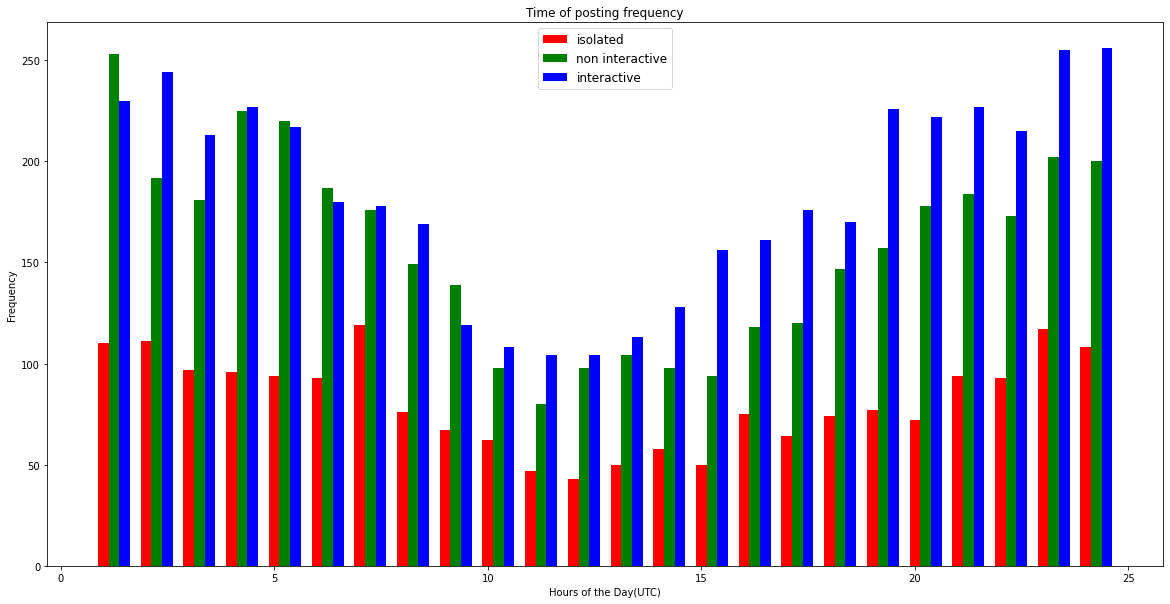

In [ ]:
import numpy as np
hours = np.arange(1,25)
width = 0.25 
plt.figure(figsize = (20, 10))
bar1 = plt.bar(hours,isolated_times, width, color = 'r')

bar2 = plt.bar(hours+width, non_interactive_times, width, color='g')
  
bar3 = plt.bar(hours+width*2, interactive_times, width, color = 'b')
 
plt.xlabel("Hours of the Day(UTC)")
plt.ylabel('Frequency')
plt.title("Time of posting frequency")
  
# plt.xticks(ind+width,['2021Feb01', '2021Feb02', '2021Feb03'])
plt.legend( (bar1, bar2, bar3), ('isolated', 'non interactive', 'interactive'),fontsize='12' )
plt.show()

In [ ]:
isolated_subreddits=[]
non_interactive_subreddits=[]
interactive_subreddits=[]

In [ ]:
result = [str(x) for x in interactive_submissions['subreddit']]
subreddit_freq={}
subreddit_freq['ptsd']=0
for i in subs:
  subreddit_freq[i] = 0
for s in result:
  subreddit_freq[s]+=1
interactive_subreddits = list(subreddit_freq.values())

In [ ]:
subreddit_freq.keys()

dict_keys(['ptsd', 'ADHD', 'Anger', 'Anxiety', 'BPD', 'OCD', 'OpiatesRecovery', 'SuicideWatch', 'addiction', 'alcoholicsanonymous', 'depression', 'domesticviolence', 'eating_disorders', 'getting_over_it', 'helpmecope', 'mentalillness', 'rapecounseling', 'sad', 'selfharm', 'selfhelp', 'socialanxiety'])

In [ ]:
tmp_subs = ['ptsd']
tmp_subs.extend(subs)
print(tmp_subs)

['ptsd', 'ADHD', 'Anger', 'Anxiety', 'BPD', 'OCD', 'OpiatesRecovery', 'SuicideWatch', 'addiction', 'alcoholicsanonymous', 'depression', 'domesticviolence', 'eating_disorders', 'getting_over_it', 'helpmecope', 'mentalillness', 'rapecounseling', 'sad', 'selfharm', 'selfhelp', 'socialanxiety']


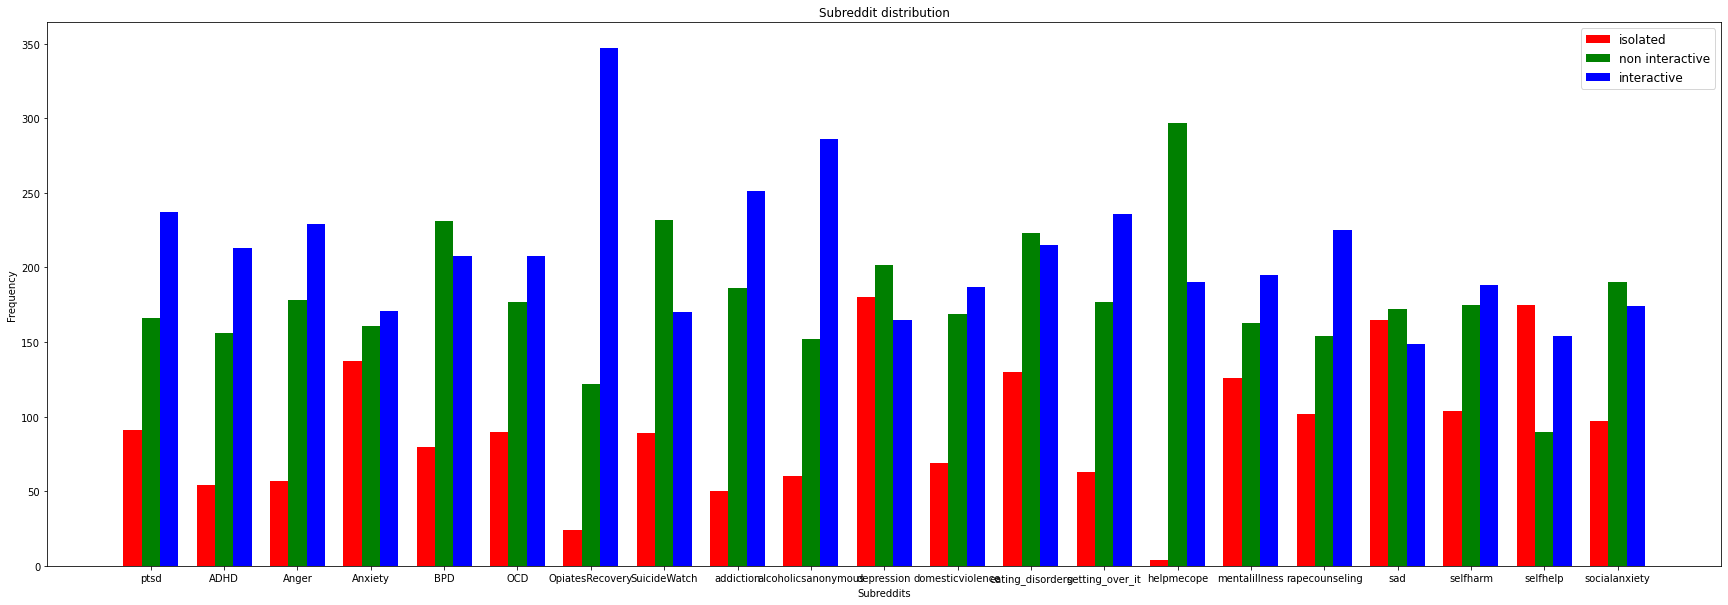

In [ ]:
import numpy as np
hours = np.arange(21)
width = 0.25 
plt.figure(figsize = (30, 10))
bar1 = plt.bar(hours,isolated_subreddits, width, color = 'r')

bar2 = plt.bar(hours+width, non_interactive_subreddits, width, color='g')
  
bar3 = plt.bar(hours+width*2, interactive_subreddits, width, color = 'b')
 
plt.xlabel("Subreddits")
plt.ylabel('Frequency')
plt.title("Subreddit distribution")

plt.xticks(hours+width,tmp_subs)
plt.legend( (bar1, bar2, bar3), ('isolated', 'non interactive', 'interactive'),fontsize='12' )
plt.show()

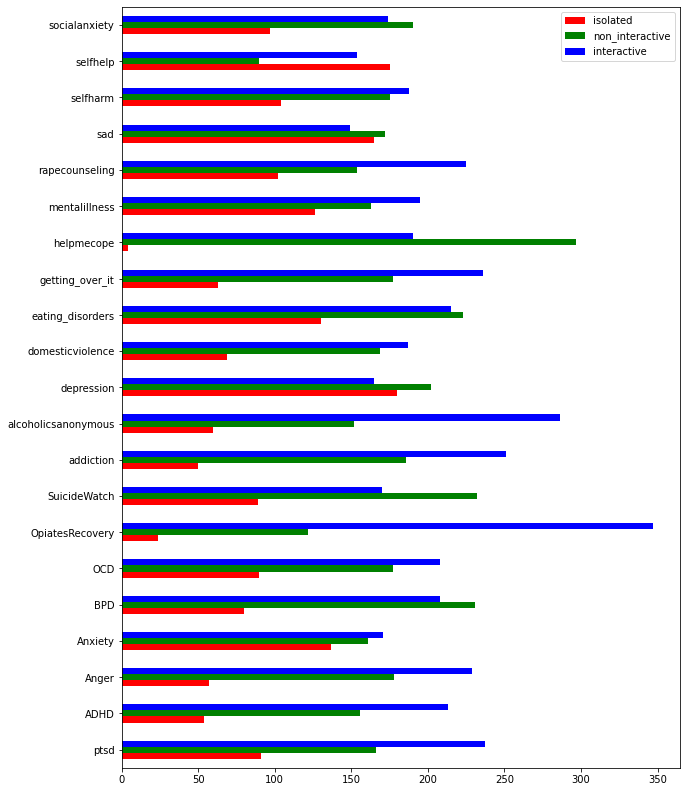

In [ ]:
df = pd.DataFrame({'isolated': isolated_subreddits,'non_interactive': non_interactive_subreddits,'interactive':interactive_subreddits}, index=tmp_subs)
df.plot.barh(figsize=(10,14),color=['red','green','blue'])